In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [3]:
# ==========================================
# 1. Load the Dataset
# ==========================================
print("Loading California Housing dataset...")
california = fetch_california_housing()

# Convert to a Pandas DataFrame for easier manipulation
df = pd.DataFrame(california.data, columns=california.feature_names)
# Add the target variable (Price) to the dataframe
df['PRICE'] = california.target

print(f"Dataset Shape: {df.shape}")
print(df.head())

Loading California Housing dataset...
Dataset Shape: (20640, 9)
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  PRICE  
0    -122.23  4.526  
1    -122.22  3.585  
2    -122.24  3.521  
3    -122.25  3.413  
4    -122.25  3.422  


In [4]:
# ==========================================
# 2. Data Cleaning (The Key Skill)
# ==========================================
print("\n--- Data Cleaning ---")

# Check for missing values
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

# Note: The California dataset is usually clean.
# However, if this were real-world messy data, we would handle it like this:
if missing_values.sum() > 0:
    print("Found missing values. Filling with column means...")
    # Option A: Drop rows with missing values
    # df.dropna(inplace=True)

    # Option B: Fill with mean/median (Imputation) - We will use this approach
    df.fillna(df.mean(), inplace=True)
else:
    print("No missing values found. Data is clean!")



--- Data Cleaning ---
Missing values in each column:
 MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
PRICE         0
dtype: int64
No missing values found. Data is clean!


In [5]:
# ==========================================
# 3. Exploratory Data Analysis (Correlation)
# ==========================================
print("\n--- Correlation Analysis ---")
# Let's see what features correlate most with PRICE
correlation_matrix = df.corr()
print("Correlation with PRICE:\n", correlation_matrix['PRICE'].sort_values(ascending=False))

# Optional: Plotting a heatmap (Uncomment to view)
# plt.figure(figsize=(10, 8))
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
# plt.title("Feature Correlation Matrix")
# plt.show()



--- Correlation Analysis ---
Correlation with PRICE:
 PRICE         1.000000
MedInc        0.688075
AveRooms      0.151948
HouseAge      0.105623
AveOccup     -0.023737
Population   -0.024650
Longitude    -0.045967
AveBedrms    -0.046701
Latitude     -0.144160
Name: PRICE, dtype: float64


In [6]:

# ==========================================
# 4. Prepare Data for Training
# ==========================================
# X = Features (everything except Price)
# y = Target (Price)
X = df.drop('PRICE', axis=1)
y = df['PRICE']

# Split into Training and Testing sets (80% train, 20% test)
# random_state ensures we get the same split every time we run the code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nTraining samples: {X_train.shape[0]}")
print(f"Testing samples: {X_test.shape[0]}")



Training samples: 16512
Testing samples: 4128


In [7]:
# ==========================================
# 5. Train the Model (Linear Regression)
# ==========================================
print("\n--- Training Model ---")
model = LinearRegression()
model.fit(X_train, y_train)

print("Model training complete.")
print(f"Intercept: {model.intercept_}")
print("Coefficients:")
for feature, coef in zip(X.columns, model.coef_):
    print(f"  {feature}: {coef:.4f}")


--- Training Model ---
Model training complete.
Intercept: -37.02327770606409
Coefficients:
  MedInc: 0.4487
  HouseAge: 0.0097
  AveRooms: -0.1233
  AveBedrms: 0.7831
  Population: -0.0000
  AveOccup: -0.0035
  Latitude: -0.4198
  Longitude: -0.4337


In [8]:
# ==========================================
# 6. Evaluation & Prediction
# ==========================================
print("\n--- Evaluation ---")

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate Metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-squared Score: {r2:.4f}")
# R-squared explains how much variance the model captures (1.0 is perfect)


--- Evaluation ---
Mean Squared Error (MSE): 0.5559
R-squared Score: 0.5758


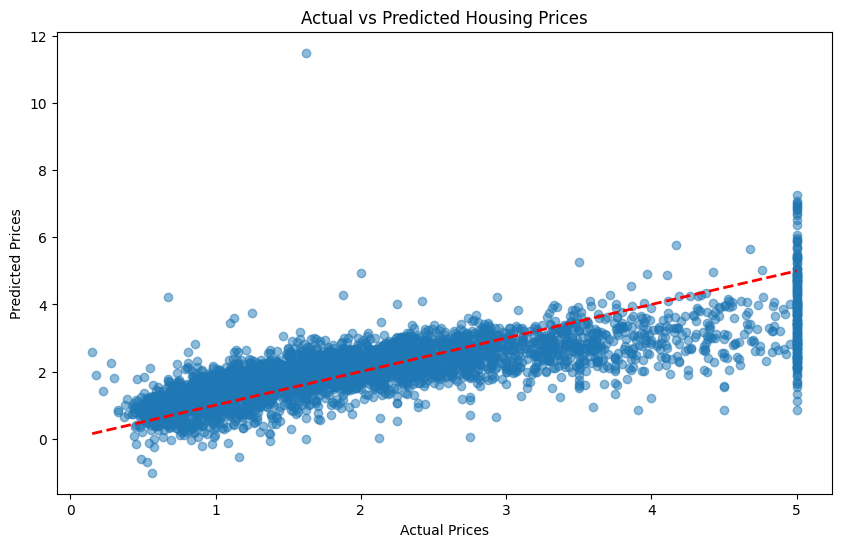

In [9]:
# ==========================================
# 7. Visualization: Actual vs Predicted
# ==========================================
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Housing Prices")
plt.show()